In [110]:
import numpy as np
import matplotlib.pyplot as plt
from fibheap import *
import pdb
from tqdm import tqdm
import heapq
from heapdict import *

In [111]:
image = plt.imread('shapes.png',)

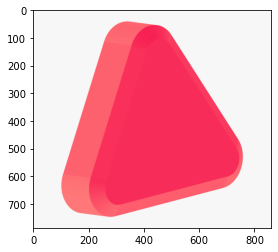

In [112]:
plt.imshow(image)

In [113]:
def get_neighbors(pixel, ymax, xmax):
    location = pixel[0]
    x = location[0]
    y = location[1]

    tl = (x-1,y-1)
    tm = (x, y-1)
    tr = (x+1, y-1)
    ml = (x-1,y)
    mr = (x+1, y)
    bl = (x-1,y+1)
    bm = (x, y+1)
    br = (x+1, y+1)
    neighbors = [tl, tm, tr, ml, mr, bl, bm, br]
    # out = []

    return [neighbor for neighbor in neighbors if not (neighbor[1] >= xmax or neighbor[0] >= ymax or neighbor[0] < 0 or neighbor[1] < 0)]

    for neighbor in neighbors: 
        neighb_x = neighbor[1]
        neighb_y = neighbor[0]

        if neighb_x >= xmax or neighb_y >= ymax or neighb_y < 0 or neighb_x < 0:
            continue
        else: 
            out.append(neighbor)

    return out
         

In [114]:
labCRT = np.zeros(image.shape[:-1])
distCRT = np.full(image.shape[:-1], np.inf)

labCRT[400,400] = 1
distCRT[400,400] = 0

labCRT[100,100] = 2
distCRT[100,100] = 0

ymax = len(image) #num rows
xmax = len(image[0]) #num columns

# heap = {(i,j): distCRT[i,j] for i in range(len(image)) for j in range(len(image[0]))}

heap = heapdict()

for j in range(len(image[0])):
    for i in range(len(image)):
        heap[(i,j)] = distCRT[i,j]

pbar = tqdm(ymax * xmax)
changes = 0

while len(heap):
    first = len(heap)
    smallest_pixel = heap.popitem()
    second = len(heap)

    if second == first:
        pdb.set_trace()



    # pdb.set_trace()
    #for all the neighbors of smallest_pixel:
    # pdb.set_trace()
    neighbors = get_neighbors(smallest_pixel, ymax, xmax)
    for neighbor in neighbors:

        #calculate the distance from the neighbor to the pixel
        dist = smallest_pixel[1] + np.linalg.norm(image[neighbor] - image[smallest_pixel[0]])

        if dist < distCRT[neighbor]:

           
            # pdb.set_trace()
            labCRT[neighbor] = labCRT[smallest_pixel[0]]
            changes += 1
            # pdb.set_trace()
            third = len(heap)
            # if neighbor == (401,401) and smallest_pixel == ((402, 402), 0.0):
            #     pdb.set_trace()
            heap[neighbor] = dist
            distCRT[neighbor] = dist
            fourth = len(heap)

    pbar.update(1)
print(changes)

676820it [02:14, 5031.29it/s] 



KeyboardInterrupt: 

benchmarks

first working: 1:26


In [ ]:
changes

16

In [ ]:
len(heap)

676705

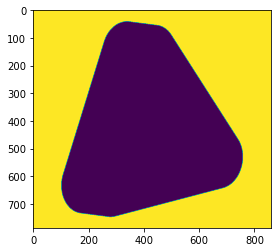

In [ ]:
plt.imshow(labCRT)

In [ ]:
fheappop(heap)

(0.0, (100, 100))